# Demo 0: ROOT C++ notebook example

This example uses the ROOT C++ kernel which is enabled automatically during ROOT installation.

The example macro is taken from here: https://root.cern/doc/master/hstack_8C.html


In [1]:
// print ROOT version
cout << ROOT_RELEASE;

6.30/02

1. Create three histograms and add them to the stack.

In [2]:
auto hs = new THStack("hs","Stacked 1D histograms");
auto h1st = new TH1F("h1st","test hstack",100,-4,4);
h1st->FillRandom("gaus",20000);
h1st->SetFillColor(kRed);
h1st->SetMarkerStyle(21);
h1st->SetMarkerColor(kRed);
hs->Add(h1st);
auto h2st = new TH1F("h2st","test hstack",100,-4,4);
h2st->FillRandom("gaus",15000);
h2st->SetFillColor(kBlue);
h2st->SetMarkerStyle(21);
h2st->SetMarkerColor(kBlue);
hs->Add(h2st);
auto h3st = new TH1F("h3st","test hstack",100,-4,4);
h3st->FillRandom("gaus",10000);
h3st->SetFillColor(kGreen);
h3st->SetMarkerStyle(21);
h3st->SetMarkerColor(kGreen);
hs->Add(h3st);

2. Create a canvas (plots will appear after the canvas is drawn).

In [3]:
auto cst = new TCanvas("cst","stacked hists",10,10,700,700);
cst->Divide(2,2);

3. In top left pad, draw the stack with defaults.

In [4]:
cst->cd(1);
hs->Draw();

4. In top right pad, draw the stack in non-stack mode and errors option.

In [5]:
cst->cd(2);
gPad->SetGrid();
hs->Draw("nostack,e1p");

5. In bottom left, draw in stack mode with `lego1` option.

In [6]:
cst->cd(3);
gPad->SetFrameFillColor(17);
gPad->SetTheta(3.77);
gPad->SetPhi(2.9);
hs->Draw("lego1");

6. Create two 2-D histograms and draw them in stack mode in bottom right.

In [7]:
cst->cd(4);
gPad->SetFrameFillColor(17);
auto a = new THStack("a","Stacked 2D histograms");
auto f1 = new TF2("f1", "xygaus + xygaus(5) + xylandau(10)",-4,4,-4,4);
Double_t params1[] = {130,-1.4,1.8,1.5,1, 150,2,0.5,-2,0.5,3600,-2,0.7,-3,0.3};
f1->SetParameters(params1);
auto h2sta = new TH2F("h2sta","h2sta",20,-4,4,20,-4,4);
h2sta->SetFillColor(38);
h2sta->FillRandom("f1",4000);
auto f2 = new TF2("f2","xygaus + xygaus(5)",-4,4,-4,4);
Double_t params2[] = {100,-1.4,1.9,1.1,2, 80,2,0.7,-2,0.5};
f2->SetParameters(params2);
auto h2stb = new TH2F("h2stb","h2stb",20,-4,4,20,-4,4);
h2stb->SetFillColor(46);
h2stb->FillRandom("f2",3000);
a->Add(h2sta);
a->Add(h2stb);
a->Draw();

7. Draw the canvas

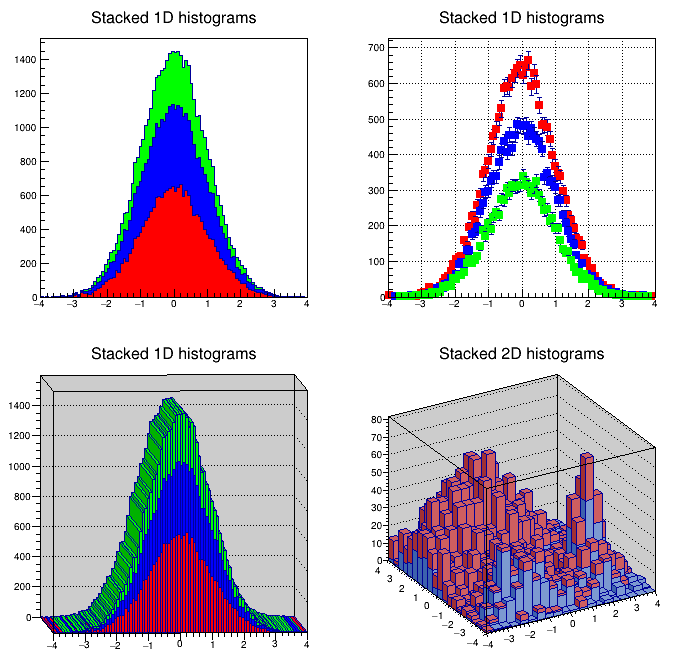

In [8]:
cst->Draw();